In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [48]:
# Load the training set
df = pd.read_csv(r'.\eyeTracking_dataset/eyetracking_dataset.csv')

print("#-----> First 5 rows of the training set:\n")
df.head(5)

#-----> First 5 rows of the training set:



,Participant Code,Gender,Avg_Fix_Duration,Avg_Sacc_Duration,Total_Fix,Total_Sacc,Sacc_Fix_Ratio,Dyslexic
0,111JA2,female,428.048781,22.077922,82,77,0.939024,yes
1,111RP1,male,342.020202,22.244898,99,98,0.989899,yes
2,112JU3,male,280.336135,17.857143,119,112,0.941176,no
3,112KA1,male,575.937500,9.206349,64,63,0.984375,yes
4,11GM3,male,200.173913,28.041237,115,97,0.843478,no


In [49]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import tensorflow as tf

In [50]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Dyslexic'] = label_encoder.fit_transform(df['Dyslexic'])

In [51]:
df.drop(columns=['Participant Code'], inplace=True)
X_features = df.drop(['Dyslexic'], axis=1)
y_labels= df['Dyslexic']

In [52]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=42, stratify=y_labels)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

svm_model_rbf = SVC(kernel='rbf', gamma='scale')  # RBF kernel
svm_model_rbf.fit(X_train, y_train)

# Predict on the test data
y_pred = svm_model_rbf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print("Classification Report: (RBF Kernel)")
print(classification_report(y_test, y_pred))


Accuracy: 0.8378378378378378
Classification Report: (RBF Kernel)
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        18
           1       0.93      0.74      0.82        19

    accuracy                           0.84        37
   macro avg       0.85      0.84      0.84        37
weighted avg       0.86      0.84      0.84        37



In [59]:
svm_model_linear = SVC(kernel='linear', gamma='scale')  # Linear kernel
svm_model_linear.fit(X_train, y_train)

# Predict on the test data
y_pred_linear = svm_model_linear.predict(X_test)

# Evaluate the model
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Accuracy (Linear Kernel): {accuracy_linear}")

# Classification report
print("Classification Report (Linear Kernel):")
print(classification_report(y_test, y_pred_linear))

Accuracy (Linear Kernel): 0.9459459459459459
Classification Report (Linear Kernel):
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       0.90      1.00      0.95        19

    accuracy                           0.95        37
   macro avg       0.95      0.94      0.95        37
weighted avg       0.95      0.95      0.95        37



In [78]:
import xgboost as xgb

# Convert data to DMatrix format (optimized for XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set XGBoost parameters
params = {
    'num_class': 2,  # Binary classification
    'eval_metric': 'logloss',  # Evaluation metric (log loss for binary)
    'max_depth': 3,  # Depth of each tree
    'eta': 0.01,  # Learning rate
    'silent': 1  # Silent mode (no output from XGBoost)
}

# Train XGBoost model
num_rounds = 20  # Number of boosting rounds
model = xgb.train(params, dtrain, num_rounds)

# Predict probabilities on test data
y_pred_proba = model.predict(dtest)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print("Classification Report: (XGBOOST)")
print(classification_report(y_test, y_pred))

Accuracy: 0.918918918918919
Classification Report: (XGBOOST)
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.90      0.95      0.92        19

    accuracy                           0.92        37
   macro avg       0.92      0.92      0.92        37
weighted avg       0.92      0.92      0.92        37



d:\apps n shit\programming\Python\Lib\site-packages\xgboost\core.py:160: UserWarning: [13:16:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


In [75]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_clf.fit(X_train, y_train)

# Predict on test data
y_pred = gb_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.918918918918919
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.90      0.95      0.92        19

    accuracy                           0.92        37
   macro avg       0.92      0.92      0.92        37
weighted avg       0.92      0.92      0.92        37



In [84]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost Classifier
ada_clf = AdaBoostClassifier(n_estimators=50, learning_rate=0.01, random_state=42)

# Train the model
ada_clf.fit(X_train, y_train)

# Predict on test data
y_pred = ada_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.918918918918919
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.94      0.89      0.92        19

    accuracy                           0.92        37
   macro avg       0.92      0.92      0.92        37
weighted avg       0.92      0.92      0.92        37



In [88]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Predict on test data
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9459459459459459
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.95      0.95      0.95        19

    accuracy                           0.95        37
   macro avg       0.95      0.95      0.95        37
weighted avg       0.95      0.95      0.95        37



In [ ]:
import pickle

# Save the model to a .sav file
filename = 'lr_model.sav'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

pickle.dump(scaler, open("scaler.sav", "wb"))

d:\apps n shit\programming\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


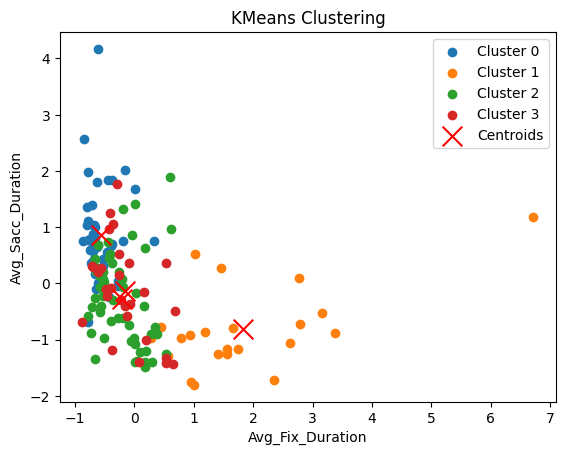

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming X_train is already defined and contains your features
# Features: Gender, Avg_Fix_Duration, Avg_Sacc_Duration, Total_Fix, Total_Sacc, Sacc_Fix_Ratio

# Define and fit the KMeans model
kmeans_model = KMeans(n_clusters=4, random_state=42)
kmeans_result = kmeans_model.fit_predict(X_train)

# Get all of the unique KMeans clusters
kmeans_clusters = np.unique(kmeans_result)

# Plot the KMeans clusters (using two features for visualization, e.g., Avg_Fix_Duration and Avg_Sacc_Duration)
for kmeans_cluster in kmeans_clusters:
    # Get data points that fall in this cluster
    index = np.where(kmeans_result == kmeans_cluster)
    # Make the plot
    plt.scatter(X_train[index, 1], X_train[index, 2], label=f'Cluster {kmeans_cluster}')  # Assuming column 1 is Avg_Fix_Duration and column 2 is Avg_Sacc_Duration

# Plot the cluster centers
centers = kmeans_model.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='red', marker='x', s=200, label='Centroids')

# Show the KMeans plot
plt.title('KMeans Clustering')
plt.xlabel('Avg_Fix_Duration')
plt.ylabel('Avg_Sacc_Duration')
plt.legend()
plt.show()
